# Movie Recommender System
## Bret Young
### DSC 680 - T302
### 16 MARCH 2021

In [1]:
import psycopg2
import pandas as pd

# set parameters
params = {
    "host" : "localhost",
    "database" : "DSC_680",
    "user" : "bretyoung"
}

# Connect to your postgres DB
def connection(params):
    conn = None
    try:
        print("Connecting to PostgreSQL...")
        conn = psycopg2.connect(**params)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1)
    print("Successful connection established.")
    return conn

def sql_to_df(conn, selection, column_names):
    # Open a cursor to perform database operations
    cur = conn.cursor()

    # Execute a query
    cur.execute(selection)

    # Retrieve query results
    records = cur.fetchall()

    # close connection
    cur.close()

    # convert query to dataframe
    df = pd.DataFrame(records, columns = column_names)
    return df

In [2]:
# select rating information from PostgreSQL
column_names = ("userid", "title", "rating")

selection = "SELECT userid, m.title, rating FROM ratings r, movies m WHERE r.movieid = m.movieid AND SUBSTRING(m.title, '([0-9]{4,4})') BETWEEN '2000' AND '2010'"
# selecting movies made in 2000's due to memory issues with full dataset, 22 million records

conn = connection(params)

# ratings dataframe
df_ratings = sql_to_df(conn, selection, column_names)

Connecting to PostgreSQL...
Successful connection established.


In [3]:
df_ratings.head()

userid                                          title  rating
0  232564                    Boondock Saints, The (2000)     5.0
1  232566                             Chicken Run (2000)     3.5
2  232566                           Almost Famous (2000)     4.0
3  232566  Lord of the Rings: The Two Towers, The (2002)     4.5
4  232567                             Next Friday (2000)     4.0

In [4]:
df_ratings.describe(include = 'all')

userid                                              title  \
count   5.943045e+06                                            5943045   
unique           NaN                                              10406   
top              NaN  Lord of the Rings: The Fellowship of the Ring,...   
freq             NaN                                              46888   
mean    1.232278e+05                                                NaN   
std     7.153748e+04                                                NaN   
min     1.000000e+00                                                NaN   
25%     6.060000e+04                                                NaN   
50%     1.230070e+05                                                NaN   
75%     1.854300e+05                                                NaN   
max     2.477530e+05                                                NaN   

              rating  
count   5.943045e+06  
unique           NaN  
top              NaN  
freq             NaN  
mean    3.498708e+00  
std     1.047263e+00  
min     5.000000e-01  
25%     3.000000e+00  
50%     3.500000e+00  
75%     4.000000e+00  
max     5.000000e+00

In [5]:
len(df_ratings.userid.unique())

153548

In [6]:
# remove any duplicate entries
df_ratings = df_ratings.drop_duplicates()

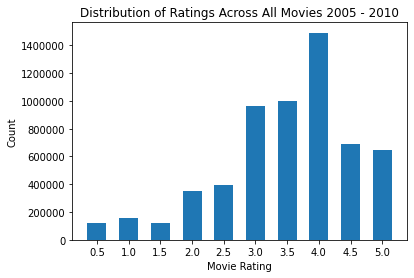

In [33]:
# View distribution of ratings 
import matplotlib.pyplot as plt

rating_count = df_ratings['rating'].value_counts() # return count for each unique value in column
rating_count = pd.DataFrame(rating_count).reset_index()
rating_count.columns = ['rating', 'count'] # rename columns after reseting the index

fig, ax = plt.subplots()

ax.bar(rating_count['rating'], height = rating_count['count'], width = 0.3)
ax.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')

plt.title('Distribution of Ratings Across All Movies 2000 - 2010')
plt.xticks(rating_count['rating'])
plt.xlabel('Movie Rating')
plt.ylabel('Count')

plt.show()

In [34]:
# transpose movie title to columns and set value to rating for each user
user_df = df_ratings.groupby(['userid','title'])['rating'].max().unstack()

In [35]:
# fill NaN with 0 indicating that the user has not rated the movie
user_df.fillna(0, inplace = True)

In [36]:
user_df.head()

title   #1 Cheerleader Camp (2010)  $5 a Day (2008)  $9.99 (2008)  \
userid                                                              
1                              0.0              0.0           0.0   
4                              0.0              0.0           0.0   
5                              0.0              0.0           0.0   
6                              0.0              0.0           0.0   
7                              0.0              0.0           0.0   

title   'Hellboy': The Seeds of Creation (2004)  'R Xmas (2001)  \
userid                                                            
1                                           0.0             0.0   
4                                           0.0             0.0   
5                                           0.0             0.0   
6                                           0.0             0.0   
7                                           0.0             0.0   

title   'Salem's Lot (2004)  'Twas the Night (2001)  \
userid                                                
1                       0.0                     0.0   
4                       0.0                     0.0   
5                       0.0                     0.0   
6                       0.0                     0.0   
7                       0.0                     0.0   

title   (500) Days of Summer (2009)  (Untitled) (2009)  ...ing (2003)  ...  \
userid                                                                 ...   
1                               0.0                0.0            0.0  ...   
4                               0.0                0.0            0.0  ...   
5                               0.0                0.0            0.0  ...   
6                               0.0                0.0            0.0  ...   
7                               0.0                0.0            0.0  ...   

title   iMurders (2008)  loudQUIETloud: A Film About the Pixies (2006)  \
userid                                                                   
1                   0.0                                            0.0   
4                   0.0                                            0.0   
5                   0.0                                            0.0   
6                   0.0                                            0.0   
7                   0.0                                            0.0   

title   xXx (2002)  xXx: State of the Union (2005)  À l'aventure (2008)  \
userid                                                                    
1              0.0                             0.0                  0.0   
4              0.0                             0.0                  0.0   
5              0.0                             0.0                  0.0   
6              0.0                             0.0                  0.0   
7              0.0                             0.0                  0.0   

title   Árido Movie (2005)  Ó Paí, Ó (2007)  Üvegtigris (2001)  \
userid                                                           
1                      0.0              0.0                0.0   
4                      0.0              0.0                0.0   
5                      0.0              0.0                0.0   
6                      0.0              0.0                0.0   
7                      0.0              0.0                0.0   

title   Škola princů (2010)  キサラギ (2007)  
userid                                    
1                       0.0          0.0  
4                       0.0          0.0  
5                       0.0          0.0  
6                       0.0          0.0  
7                       0.0          0.0  

[5 rows x 10406 columns]

In [38]:
# number of ratings conducted by a user
user_rating_count = df_ratings.groupby('userid')['rating'].agg('count')

# number of ratings a movie has received
movie_rating_count = df_ratings.groupby('title')['rating'].agg('count')

In [54]:
# Plot user rating counts
import plotly.express as px

fig = px.scatter(x = user_rating_count.index, y = user_rating_count, width = 800, height = 800, title = 'User Rating Counts', labels={'x':'UserID', 'y':'Count'})

fig.show()

fig.write_html("user_counts.html")

In [52]:
# Plot movie rating counts

fig2 = px.scatter(x = movie_rating_count.index, y = movie_rating_count, width = 800, height = 800, title = 'Movie Rating Counts', labels={'x':'', 'y':'Count'})

fig2.show()

fig2.write_html("movie_counts.html")

plot counts per movie
plot counts per user

set qualifications for users and movie review numbers

predict user rating for movieid using knn

display 10 closest movies to recommend